In [5]:
import os
import sys
sys.path.append('/data/lihaochen/projects/DisCo')
from utils.common import encoded_from_img
from utils.tsv_io import tsv_writer
from PIL import Image
import json, cv2, math, yaml
import numpy as np
import base64
import matplotlib.pyplot as plt

dataset_dir = '/data1/lihaochen/TikTok_finetuning/TiktokDance'
# split = 'train_images_densepose'
# split = 'new10val_images_densepose_new'
split = 'new10val_poses'
# split = 'new10val_images'

def tsv_reader(tsv_file, sep='\t'):
    with open(tsv_file, 'r') as fp:
        for i, line in enumerate(fp):
            yield [x.strip() for x in line.split(sep)]

tsv_fname_img = dataset_dir + f'/{split}.tsv'
tsv_imgs = tsv_reader(tsv_fname_img)

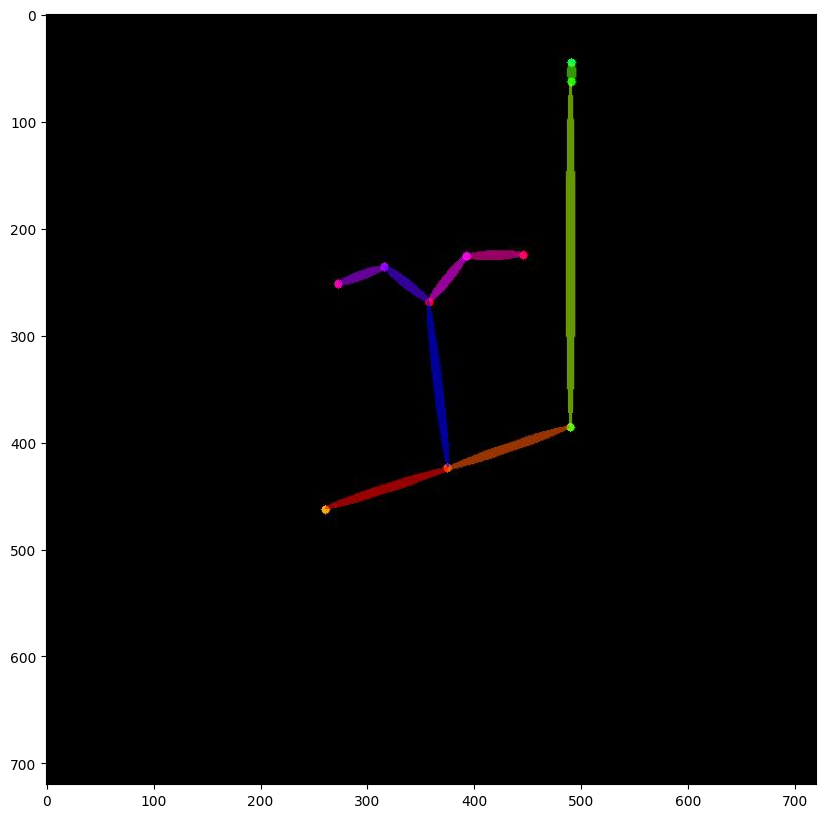

In [6]:
for i, img_row in enumerate(tsv_imgs):
    # img_key, I, U, V = img_row
    img_key, I = img_row
    if img_key != 'TiktokDance_203_006_1x1_00208.jpg': #TiktokDance_202_025_1x1_00000jpg
        continue
    I = cv2.imdecode(np.frombuffer(base64.b64decode(I), np.uint8),cv2.IMREAD_COLOR)
    # U = cv2.imdecode(np.frombuffer(base64.b64decode(U), np.uint8),cv2.IMREAD_COLOR)
    # V = cv2.imdecode(np.frombuffer(base64.b64decode(V), np.uint8),cv2.IMREAD_COLOR)
    h, w, c = I.shape
    # print(I.shape)
    # I = I[h // 2 - 256:h //2 + 256, w // 2 - 256: w // 2 + 256]
    cv2.imwrite('pose.png', I)
    plt.figure(figsize=(10, 10))

    plt.imshow(I[:,:,::-1])

    # plt.subplot(1,3,1)
    # plt.axis('off')
    # plt.title('I',fontsize=18)
    # plt.imshow(I[:,:,::-1])

    # plt.subplot(1,3,2)
    # plt.axis('off')
    # plt.title('U',fontsize=18)
    # plt.imshow(U[:,:,::-1])

    # plt.subplot(1,3,3)
    # plt.axis('off')
    # plt.title('V',fontsize=18)
    # plt.imshow(V[:,:,::-1])

    plt.show()
    break